In [2]:
#analyzing the csv files
import pandas as pd 
import glob
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("results.csv")
#loop through each csv file in trained models -> get lowest (val) loss and num epochs
#use pd.describe()
data.describe()

,epochs,val_loss,loss
count,17.0,16.000000,16.000000
mean,200.0,0.021000,0.021989
std,0.0,0.002833,0.002721
min,200.0,0.017498,0.019096
25%,200.0,0.019547,0.020407
50%,200.0,0.020166,0.021095
75%,200.0,0.021128,0.023046
max,200.0,0.029096,0.030042


In [4]:
#print(data)
#loop through csv files 
#append them to new csv file
#save the name?
""" newData = []
path = "trainedModels/*.csv"
#print(newData)
for fname in glob.glob(path):
    df = pd.read_csv(fname)
    new_row = [fname, df.loc[0][-1], df.loc[4].min(), df.loc[1][-1]]
    #create new row with name, epochs,etc
    newData.append(new_row)
    #print(df.loc[4].min())
 """

' newData = []\npath = "trainedModels/*.csv"\n#print(newData)\nfor fname in glob.glob(path):\n    df = pd.read_csv(fname)\n    new_row = [fname, df.loc[0][-1], df.loc[4].min(), df.loc[1][-1]]\n    #create new row with name, epochs,etc\n    newData.append(new_row)\n    #print(df.loc[4].min())\n '

In [5]:
#
#data = pd.DataFrame(newData, columns=["name", "epochs", "val_loss", "loss"])
data=pd.read_csv("000plane0results.csv", names=['q','t','normed','reco','cosz','num_epoch','training_loss','val_loss'])
#this csv is a collection of data prep combos where only reco was constant (plane)
print(data)

        q      t  normed   reco  cosz  num_epoch  training_loss  val_loss
0    mean   mean    True  plane   NaN         40       0.021713  0.021580
1    mean   mean    True  plane   NaN         36       0.022341  0.021914
2    mean   mean   False  plane   NaN         41       0.022924  0.022405
3    mean   mean   False  plane   NaN         32       0.024121  0.022826
4    mean    sum    True  plane   NaN         20            NaN       NaN
..    ...    ...     ...    ...   ...        ...            ...       ...
163   NaN    NaN   False  plane   NaN         39       0.020311  0.020020
164   NaN  False    True  plane   NaN         53       0.020491  0.020561
165   NaN  False    True  plane   NaN         59       0.020477  0.020277
166   NaN  False   False  plane   NaN         32       0.021222  0.020367
167   NaN  False   False  plane   NaN         33       0.021067  0.020430

[168 rows x 8 columns]


In [6]:
data.describe()
#data.loc[data["val_loss"]<0.020]
#time heavily affects the model's performance
#try patience of 100-200 epochs; see what happens
#might train all every combination to weed out patterns
#compare width of energy resolution distribution for max to avg width of other charge for similar parameters
#compare best perfoming
#get 25th percentile, find patterns
#compare worst and best performing
#train one with patience of 100 epochs

,cosz,num_epoch,training_loss,val_loss
count,0.0,168.000000,144.000000,144.000000
mean,NaN,36.982143,0.022473,0.021735
std,NaN,10.956350,0.001748,0.002073
min,NaN,20.000000,0.018428,0.018600
25%,NaN,30.000000,0.021193,0.020006
50%,NaN,36.000000,0.022333,0.021220
75%,NaN,44.000000,0.023673,0.022895
max,NaN,76.000000,0.026554,0.026720


In [7]:
#print("The best performing combination where reco is plane and cosz is None")
data.loc[data["val_loss"]>=0.026]


,q,t,normed,reco,cosz,num_epoch,training_loss,val_loss
98,min,min,False,plane,NaN,31,0.025893,0.026053
99,min,min,False,plane,NaN,30,0.026554,0.026128
103,min,max,False,plane,NaN,47,0.025622,0.026211
107,min,NaN,False,plane,NaN,30,0.026270,0.026270
111,min,False,False,plane,NaN,28,0.026500,0.026720


In [8]:
print("The combinations performing in the 25th percentile")
data.loc[data["val_loss"]<=0.020006]
#which data prep value/pattern is the most prevalent?

The combinations performing in the 25th percentile


,q,t,normed,reco,cosz,num_epoch,training_loss,val_loss
36,sum,product,True,plane,NaN,29,0.021452,0.019776
37,sum,product,True,plane,NaN,32,0.021607,0.019605
44,sum,max,True,plane,NaN,36,0.021118,0.019962
48,sum,NaN,True,plane,NaN,47,0.022452,0.019934
56,product,mean,True,plane,NaN,41,0.020567,0.019414
57,product,mean,True,plane,NaN,58,0.019363,0.019451
64,product,product,True,plane,NaN,52,0.020306,0.018600
65,product,product,True,plane,NaN,40,0.020747,0.019397
66,product,product,False,plane,NaN,41,0.021611,0.019878
67,product,product,False,plane,NaN,37,0.021918,0.019519


plot of training and validation loss of best performing model


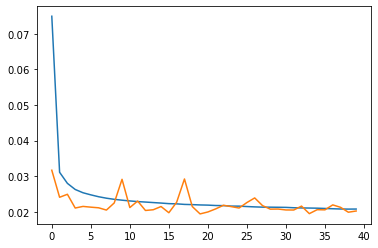

In [12]:
print("plot of training and validation loss of best performing model")
best = pd.read_csv("trainedModels/productproductTrueplaneNone.csv")
plt.plot(best["epoch"],best["loss"],best["val_loss"])
#immediate overfitting, learning too quickly -> model is too complex/not flexible enough
#look into measuring uncertainty

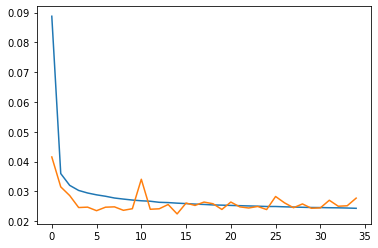

In [10]:
mid = pd.read_csv("trainedModels/maxFalseTrueplaneNone.csv")
plt.plot(mid["epoch"],mid["loss"],mid["val_loss"])

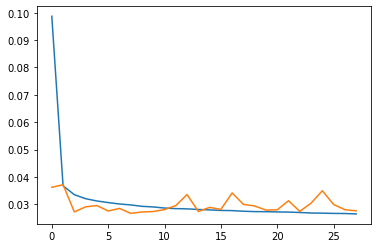

In [11]:
meh = pd.read_csv("trainedModels/minFalseFalseplaneNone.csv")
plt.plot(meh["epoch"],meh["loss"],meh["val_loss"])